#**ICE - EDA: Data Visualizations**

## Student Name: Cabot Steward

## Exercise

For this assignment, students will use the dataset globalsuperstore.xlsx.

This is a dataset pulled from the online orders for SuperStore. This store sells items that are divided into three categories: technology, furniture, and office supplies. We'll explore this dataset through exploratory data analysis using data visualizations to help us determine which category should be invested in.

This data should be considered cleaned and prepped. Several data points are recorded for each visit, including:

* Row ID: A unique identifier for each row.
* Order ID: A unique identifier for each order.
* Order Date: The month, day, and year the order was placed.
* Ship Date: The month, day, and year the order was shipped.
* Segment: The market segment the order is coming from: Consumer, Corporate, or Home Office
* State: The state in which the order was placed.
* Country: The country in which the order was placed.
* Region: The region in which the order was placed.
* Product ID: The unique identification of the product sold.
* Category: The category the product falls under. (Technology, Furniture, Office Supplies)
* Sub-Category: The subcategory the product falls under.
* Product Name: The name of the product sold.
* Sales: The total amount of sales in dollars.
* Quantity: The amount of products sold in the order.
* Discount: The discount given on the order.
* Discount Category: Categories for discount used to create a histogram.
* Profit: The profit created from the order.
* Profit %: The amount of the sale that is the profit.
* Profit % Category: The profit for each product category.

##**1.**
**Import the globalsuperstore.xlsx and load the pandas, numPy and matplotlib libraries. For each variable listed below, indicate whether the variable is nominal, ordinal, or quantitative continuous. Hint: Dates are de facto continuous variables.**

In [1]:
import warnings
warnings.filterwarnings("ignore") #this can be removed but will help the code be a little cleaner by ignoring warnings

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("globalsuperstore.xlsx")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Segment,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Sales Category,Quantity,Discount,Discount Category,Profit,Profit %,Profit % Category
0,34559,CA-2011-140662,"Thursday, November 17, 2011","Saturday, November 19, 2011",Corporate,California,United States,West,OFF-PA-10003395,Office Supplies,Paper,Xerox 1941,733.95,$500-$1000,7,0.0,0,352.2960,0.48,40%-50%
1,41207,US-2012-129007,"Thursday, September 13, 2012","Saturday, September 15, 2012",Corporate,California,United States,West,OFF-PA-10000994,Office Supplies,Paper,Xerox 1915,209.70,$100- $250,2,0.0,0,100.6560,0.48,40%-50%
2,33971,CA-2014-136875,"Thursday, December 4, 2014","Thursday, December 4, 2014",Consumer,California,United States,West,OFF-PA-10000357,Office Supplies,Paper,Xerox 1888,166.44,$100- $250,3,0.0,0,79.8912,0.48,40%-50%
3,33459,CA-2014-166296,"Friday, March 14, 2014","Thursday, March 20, 2014",Home Office,California,United States,West,OFF-PA-10004359,Office Supplies,Paper,Multicolor Computer Printout Paper,314.55,$250-$500,3,0.0,0,150.9840,0.48,40%-50%
4,31773,CA-2011-144666,"Wednesday, November 9, 2011","Friday, November 11, 2011",Consumer,California,United States,West,OFF-PA-10003465,Office Supplies,Paper,Xerox 1912,94.85,$80-$100,5,0.0,0,45.5280,0.48,40%-50%


* **Category:** - nominal qualitative (category)
* **Sales:** - ratio quantitative (sales amount in $)
* **Sales Category:** - ordinal qualitative (categorical for examples $500-$1000) 
* **Order Date:** - interval quantitative

##**2**

**The histogram below was created using the Profit% Category attribute. It shows the amount of the sale that is profit in each category.**






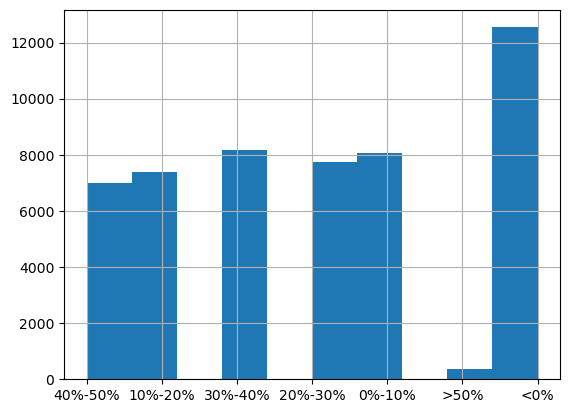

In [3]:
df['Profit % Category'].hist()
plt.show()

## **A**

**What is wrong with this visualization and how do we fix it?**

your x axis is not in order.

In [4]:
df.replace({ '<0%': 0,
            '0%-10%': 10,
            '10%-20%': 20,
            '20%-30%': 30,
            '30%-40%': 40,
            '40%-50%': 50,
            '>50%': 51}, inplace=True)

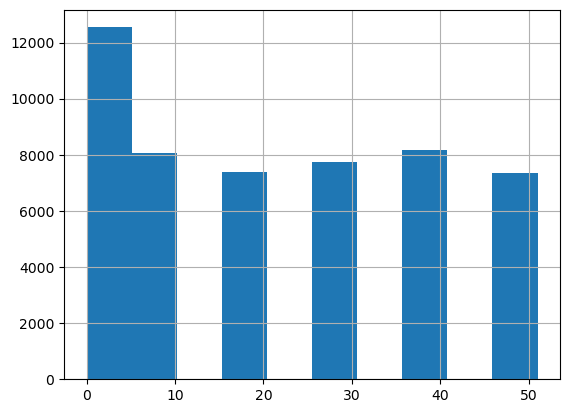

In [5]:
df['Profit % Category'].hist()
plt.show()

## **B**

**Create a second hisogram of Profit, what impact does the number of bins have on the information conveyed?**

[]

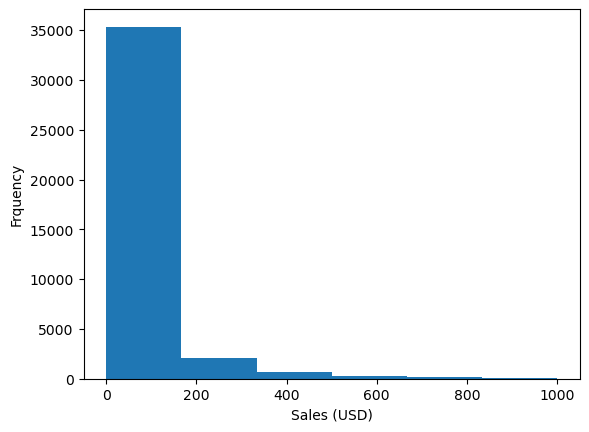

In [6]:
plt.hist(df['Profit'], bins = 6, range=[0,1000])
plt.xlabel("Sales (USD)")
plt.ylabel("Frquency")
plt.plot()

The number of bins effects how detailed the visual is going to be, to many and it wont communicate the data effectively, to little and it will also fall short.

## **C**

**In this case, would it be better to report the median and or the mean of Profit? Explain.**

median - this is due to the fact the data contains some outliers

## **3.**

**Produce the descriptive statistics for another attribute, Quantity.**

In [7]:
# describe the quantity column
df['Quantity'].describe()


count    51290.000000
mean         3.476545
std          2.278766
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         14.000000
Name: Quantity, dtype: float64

**Quantity appears to have a similar mean and median value, but does it have any outliers that could be leading the mean to be larger than the median? Use a boxplot to identify whether there are outliers in Quantity of products in orders by Category.**

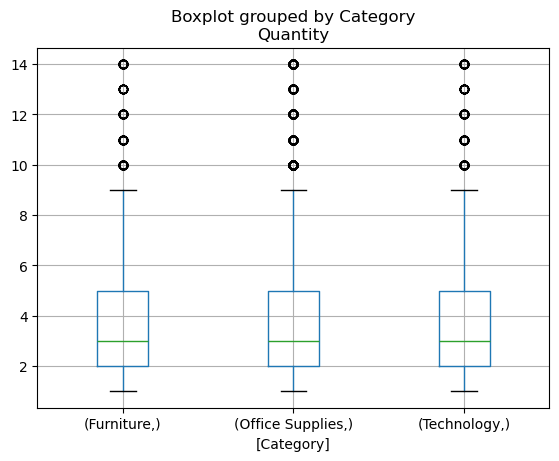

In [8]:
df.boxplot(column=['Quantity'], by=['Category'])
plt.show()

Are there outliers? - Yes there are outliers

## **4.**

**Create a stacked column chart that shows the count of Sales in each category. Add a descriptive title.**

In [9]:
category_counts = df['Category'].value_counts() # store the value_counts
category_counts

Category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64

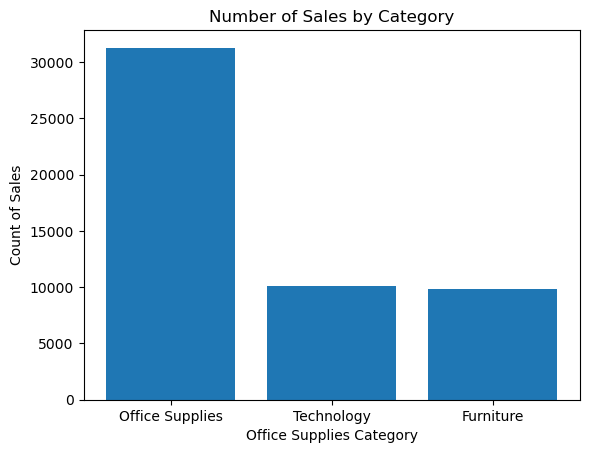

In [10]:
plt.bar(x = category_counts.index.values, height = category_counts)
plt.title("Number of Sales by Category")
plt.ylabel("Count of Sales")
plt.xlabel("Office Supplies Category")
plt.show()

###**A.**

**Which category has the highest count of sales? Include the category and sales amount in your answer.**

Office Supplies - 31273 

###**B.**

**Does it make sense that this category has the most sales? Explain.**

I would say yes, this category likely contains cheap high volume items.  A category such as technology likely has more sales in terms of $$$ but less in terms of quantity.

## **5**

**Starting with your visualization from Q4, change the aggregation method to Average to show the Average sales amount for each category. Be sure to include a descriptive title.**

In [11]:
group = df.groupby(by = "Category")["Sales"].describe() # get descriptive stats for specific column
group_averages = group['mean'] # extract the mean
# display group averages
group_averages

Category
Furniture          416.248905
Office Supplies    121.097120
Technology         467.858939
Name: mean, dtype: float64

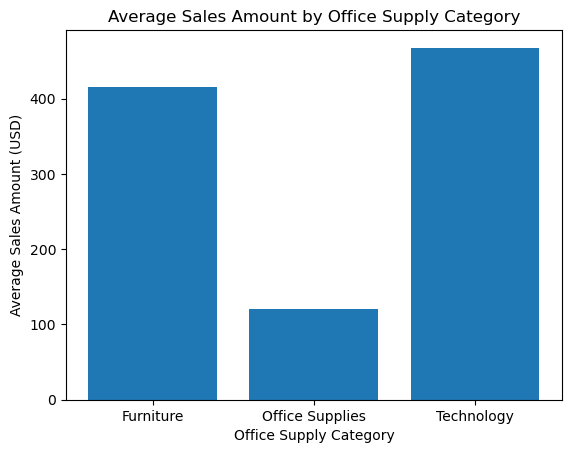

In [12]:
plt.bar(x = group_averages.index.values, height = group_averages)
plt.title("Average Sales Amount by Office Supply Category")
plt.ylabel("Average Sales Amount (USD)")
plt.xlabel("Office Supply Category")
plt.show()

###**A.**

**What category has the highest average Sales? Include the category and the average sales amount in your answer.**

Technology - 467.858939

###**B.**

**Provide a hypothesis as to why the category with the highest average sales has the lowest total sales.**

Items in Technology are more expensive than any other categories.  Companies will spend a premium on these items due to their ability to increase speed.

## **6**

**Create a clustered column chart showing the Average Profit % by Category. Add a descriptive title.**

In [29]:
group  = df.groupby(by = "Category")["Profit %"].describe() # choose how to group the data
# group_averages = group[''] # take the mean of a specific column
group_averages = group['50%']
# display group averages
group_averages

Category
Furniture          0.1142
Office Supplies    0.1983
Technology         0.1444
Name: 50%, dtype: float64

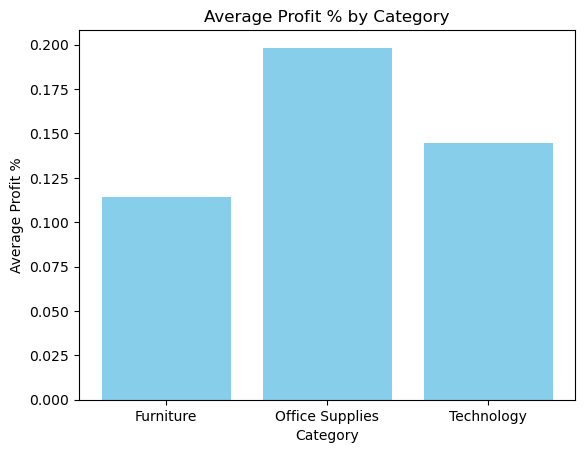

In [30]:
plt.bar(group_averages.index, height=group_averages, color='skyblue')

plt.xlabel("Category")
plt.ylabel("Average Profit %")
plt.title("Average Profit % by Category")
plt.show()

###**A.**

**Which category earns the highest profit percentage on average? What is that percentage?**

Technology

###**B.**

**Does it makes sense that this category has the highest average profit percentage?**

## **7**

**Create a line chart showing the Average Profit % over time (use the Order Date) by Categories. Provide a descriptive title.**

In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date']) #convert order date to date-time format
df['Year'] = df['Order Date'].dt.year
#display df headers
df.head()

,Row ID,Order ID,Order Date,Ship Date,Segment,State,Country,Region,Product ID,Category,...,Product Name,Sales,Sales Category,Quantity,Discount,Discount Category,Profit,Profit %,Profit % Category,Year
0,34559,CA-2011-140662,2011-11-17,"Saturday, November 19, 2011",Corporate,California,United States,West,OFF-PA-10003395,Office Supplies,...,Xerox 1941,733.95,$500-$1000,7,0.0,0,352.2960,0.48,50,2011
1,41207,US-2012-129007,2012-09-13,"Saturday, September 15, 2012",Corporate,California,United States,West,OFF-PA-10000994,Office Supplies,...,Xerox 1915,209.70,$100- $250,2,0.0,0,100.6560,0.48,50,2012
2,33971,CA-2014-136875,2014-12-04,"Thursday, December 4, 2014",Consumer,California,United States,West,OFF-PA-10000357,Office Supplies,...,Xerox 1888,166.44,$100- $250,3,0.0,0,79.8912,0.48,50,2014
3,33459,CA-2014-166296,2014-03-14,"Thursday, March 20, 2014",Home Office,California,United States,West,OFF-PA-10004359,Office Supplies,...,Multicolor Computer Printout Paper,314.55,$250-$500,3,0.0,0,150.9840,0.48,50,2014
4,31773,CA-2011-144666,2011-11-09,"Friday, November 11, 2011",Consumer,California,United States,West,OFF-PA-10003465,Office Supplies,...,Xerox 1912,94.85,$80-$100,5,0.0,0,45.5280,0.48,50,2011


In [23]:
df_year = df.groupby(['Category', 'Year'])
#create pivot table of descriptive statistics organized 
# by category and year
# produce descriptive stats
df_year.describe()

Row ID                                         \
                        count          mean   min       25%      50%   
Category        Year                                                   
Furniture       2011   1762.0  25284.450057  49.0  12513.50  26440.0   
                2012   2045.0  23862.745721   2.0  10161.00  24000.0   
                2013   2722.0  23714.965834  13.0  10024.00  24102.0   
                2014   3347.0  24973.190021  38.0  11867.00  25707.0   
Office Supplies 2011   5446.0  26671.408924  51.0  14350.00  27066.5   
                2012   6707.0  25668.455047   4.0  12981.50  25062.0   
                2013   8391.0  25672.643427   7.0  12326.50  25771.0   
                2014  10729.0  26335.795694   1.0  13506.00  26097.0   
Technology      2011   1790.0  25466.106704  52.0  12800.25  25614.0   
                2012   2210.0  25671.684163  48.0  13049.25  25670.5   
                2013   2686.0  25189.081162   8.0  12278.75  24882.5   
                2014   3455.0  25616.910564  26.0  13155.00  25273.0   

                                                      Order Date  \
                           75%      max           std      count   
Category        Year                                               
Furniture       2011  36784.50  51193.0  14466.512197       1762   
                2012  35633.00  51251.0  14502.389576       2045   
                2013  36082.50  51280.0  14612.750870       2722   
                2014  37279.00  51284.0  14650.845250       3347   
Office Supplies 2011  39291.50  51290.0  14605.397799       5446   
                2012  38922.00  51289.0  14781.160285       6707   
                2013  39221.50  51279.0  15225.441969       8391   
                2014  39590.00  51283.0  14801.440791      10729   
Technology      2011  37443.75  51202.0  14675.163280       1790   
                2012  37744.50  51287.0  14610.701406       2210   
                2013  38420.50  51276.0  15022.523382       2686   
                2014  38184.50  51260.0  14554.655289       3455   

                                                     ... Profit %            \
                                               mean  ...      max       std   
Category        Year                                 ...                      
Furniture       2011  2011-08-08 20:41:24.449489152  ...      0.5  0.468485   
                2012  2012-08-03 05:50:40.195599104  ...      0.5  0.454950   
                2013  2013-07-31 08:41:36.987509248  ...      0.5  0.437131   
                2014  2014-08-03 11:52:28.252166144  ...      0.5  0.438414   
Office Supplies 2011  2011-08-03 17:35:00.771208192  ...      0.5  0.502171   
                2012  2012-08-02 04:08:24.547487744  ...      0.5  0.486065   
                2013  2013-07-29 07:52:06.349660672  ...      0.5  0.463819   
                2014  2014-07-31 00:23:21.211669248  ...      0.5  0.482971   
Technology      2011  2011-08-05 04:56:50.949720832  ...      0.5  0.453910   
                2012  2012-07-30 21:18:24.434389248  ...      0.5  0.435034   
                2013  2013-07-31 01:06:28.682055168  ...      0.5  0.429035   
                2014  2014-08-01 17:52:48.625180928  ...      0.5  0.410589   

                     Profit % Category                                    \
                                 count       mean  min   25%   50%   75%   
Category        Year                                                       
Furniture       2011            1762.0  19.061294  0.0   0.0  20.0  30.0   
                2012            2045.0  18.943765  0.0   0.0  20.0  30.0   
                2013            2722.0  19.238428  0.0   0.0  20.0  30.0   
                2014            3347.0  18.973110  0.0   0.0  20.0  30.0   
Office Supplies 2011            5446.0  24.359346  0.0  10.0  20.0  40.0   
                2012            6707.0  23.783659  0.0  10.0  20.0  40.0   
                2013            8391.0  24.128590  

In [24]:
average = df_year.describe()['Profit %']
#examine just average profit % grouped by year and category
average = average['mean'] # grab just the mean
average = average.unstack(level=0) # unstack the table
average.head()

Category,Furniture,Office Supplies,Technology
Year,,,
2011,-0.001608,0.054405,0.035249
2012,0.011851,0.053909,0.056671
2013,0.012962,0.067916,0.042526
2014,0.008425,0.057440,0.058248


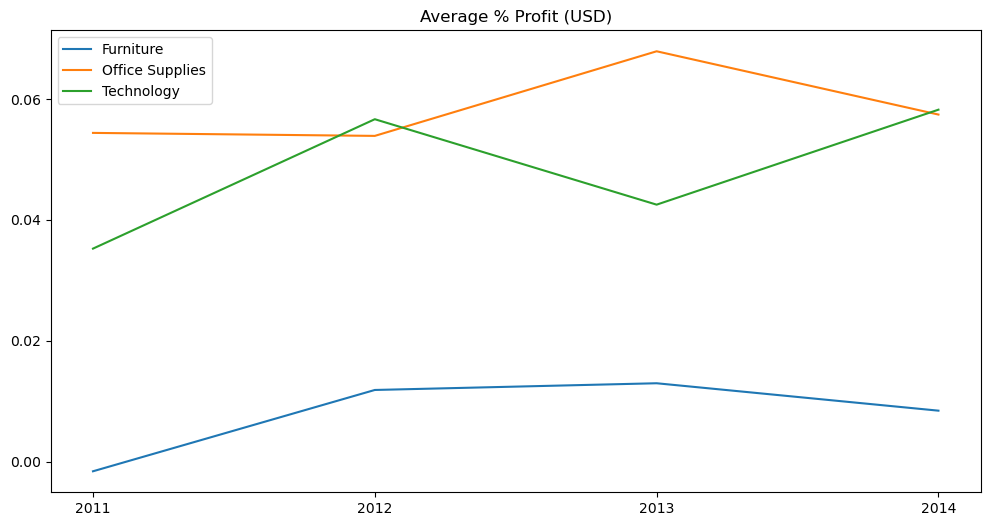

In [25]:
fig, ax = plt.subplots(1, figsize=(12,6))
for year in average.columns:
    plt.plot(average[year].index, average[year].values)

plt.legend(average.columns)
plt.title("Average % Profit (USD)")
plt.locator_params(nbins=4)
plt.show()

### **A.**

**Which category has the most constant Average Profit % between 2011 and 2014? Does this make sense?**

Furniture - I would say it makes sense, I would expect office supplies to change the least.  Technology will flucuate very heavily due to the need for capital expenditure. 

## **8**

**Create a Pie chart showing the number of sales per market segment.**

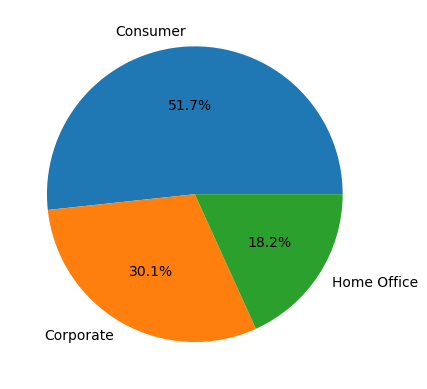

In [27]:
segment_counts = df['Segment'].value_counts()

plt.pie(segment_counts.values, labels = segment_counts.index.values, autopct='%1.1f%%')
plt.show()

### **A.**

**Which Category (Technology, Furniture, or Office Supplies) would you recommend investing in and why?**

I would invest in Technology.  Furniture would be a terrible investment, we see that above with the percent profit being near non-existent.  Technology is much better for profit margin while being a lower volume shipped.